In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')
%matplotlib inline

In [3]:
!pip install gensim

  Using cached jmespath-0.9.3-py2.py3-none-any.whl
  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\inpganavar\AppData\Local\pip\Cache\wheels\cf\54\36\b003d8c2d26aadffc21f0677009ed53cf9575a97fc71fbba76
Successfully built smart-open
  Found existing installation: chardet 2.3.0
    Uninstalling chardet-2.3.0:
      Successfully uninstalled chardet-2.3.0


You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
# load the google word2vec model this takes time and memory and hence it's wise to do it first and them move to other
from gensim.models import KeyedVectors
filename = 'Word2Vec\\GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [7]:
with open('Manual WorkItems alltypes Security.csv', encoding='ascii', errors='ignore') as infile:
    dataset1 = pd.read_csv(infile,names = ['Title', 'Security', 'SourceLink'])
with open('Manual WorkItems alltypes nonSecurity.csv', encoding='ascii', errors='ignore') as infile:
    dataset2 = pd.read_csv(infile,names = ['Title', 'Security', 'SourceLink'])

In [8]:
dataset1 = dataset1.sample(frac = 0.45, random_state= 123).reset_index(drop = True)
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63262 entries, 0 to 63261
Data columns (total 3 columns):
Title         63261 non-null object
Security      63262 non-null object
SourceLink    63262 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


In [9]:
dataset1['IsSecured'] = 1
dataset2['IsSecured'] = 0

In [10]:
dataset = pd.concat([dataset1, dataset2]).reset_index(drop = True)
dataset.head()

,Title,Security,SourceLink,IsSecured
0,[WDGISScan] Perf.Service.PASAPI 'pasdb.westus....,MS.Security,https://microsoft.visualstudio.com/DefaultColl...,1
1,[Studio]Form shouldn't load another datasource...,MS.Security,https://msazure.visualstudio.com/DefaultCollec...,1
2,Glusterfs should only allow certain ip range t...,MS.Security,https://msasg.visualstudio.com/DefaultCollecti...,1
3,[dev15->devmain] Fuzzing: Mac Word: doc: Proba...,MS.Security,http://bugcheck/bugs/OfficeMain/75542,1
4,(Port to wacserver 16) MSRC 32783. Word Crash ...,MS.Security,https://office.visualstudio.com/DefaultCollect...,1


In [11]:
dataset = dataset.sample(frac = 1).reset_index(drop = True)
dataset.head()

,Title,Security,SourceLink,IsSecured
0,Email address logged in IfxRequestEvent,MS.Security,https://identitydivision.visualstudio.com/Defa...,1
1,RUSH_Localization - WW Dash languages - Xbox O...,MS.GlobalReadiness,https://microsoft.visualstudio.com/DefaultColl...,0
2,Outlook TLS1.2 Support: Unable configure outl...,MS.Security,https://dynamicscrm.visualstudio.com/DefaultCo...,1
3,Semmle: windows/AdvCore/gdiplus11/Engine/text/...,MS.Security,https://microsoft.visualstudio.com/DefaultColl...,1
4,Make Address1 and Address2 fields on supplier ...,MS.Security,https://msazure.visualstudio.com/DefaultCollec...,1


In [12]:
dataset.dropna(axis=0, how='any', inplace = True)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122058 entries, 0 to 122059
Data columns (total 4 columns):
Title         122058 non-null object
Security      122058 non-null object
SourceLink    122058 non-null object
IsSecured     122058 non-null int64
dtypes: int64(1), object(3)
memory usage: 4.7+ MB


In [14]:
from nltk.corpus import stopwords
my_stopwords = stopwords.words('english')
type(my_stopwords),my_stopwords

(list,
 ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further'

In [15]:
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm1
from statsmodels.formula.api import logit, ols, poisson, probit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
import os, sys
def splitall(path):
    allparts = []
    while 1:
        parts = os.path.split(path)
        if parts[0] == path:  # sentinel for absolute paths
            allparts.insert(0, parts[0])
            break
        elif parts[1] == path: # sentinel for relative paths
            allparts.insert(0, parts[1])
            break
        else:
            path = parts[0]
            allparts.insert(0, parts[1])
    return " ".join(allparts)

In [17]:
#I will now apply the splitall function on the dataset.
dataset['Parsed Title'] = dataset['Title'].apply(splitall)
#dataset.head(100)

In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def clean_text(text):
    text = "".join([char if char.isalpha() else " " for char in text.lower()]).split()
    text = [ps.stem(word) for word in text]
    #text = " ".join([word for word in text if (word not in my_stopwords and len(word) > 2)])
    text = " ".join([word for word in text if (len(word) > 2)])
    return text.lower()

In [19]:
%time dataset['Clean Title'] = dataset['Parsed Title'].apply(clean_text)

Wall time: 46.9 s


In [20]:
def buildSentenceVector(text):
    sent_vec = np.zeros(300).reshape((1, 300))
    count = 0.
    for word in text:
        try:
            sent_vec += model[word].reshape((1, 300))
            count += 1.
        except KeyError:
            continue
    #if count != 0:
    #    sent_vec /= count
    return sent_vec

In [23]:
review_vec = [buildSentenceVector(doc) for doc in dataset['Clean Title']]

In [29]:
#review_vec[1]
review_vec1 = [i[0] for i in review_vec] # changing from list of list to single list
review_vec2 = np.array(review_vec1)
review_df = pd.DataFrame(review_vec2)
review_df.head(),review_df.shape

(         0         1         2         3         4         5         6    \
 0  -4.142822  3.415955  0.905151  2.701172 -0.549530  1.167877 -2.396210   
 1  -7.548950  5.039429 -0.236206  4.640869 -1.992920  0.951385 -4.553650   
 2  -9.752625  4.818604 -0.357666  7.787598 -2.318420 -0.048981 -4.960999   
 3 -12.634888  7.394043  0.008911  9.979492 -4.929596  1.904236 -6.380951   
 4  -6.810181  6.276367  0.614258  6.366455 -2.187561  0.667603 -4.012146   
 
         7         8         9      ...          290       291       292  \
 0 -1.214844 -1.208496  0.502014    ...     1.744019 -0.687622 -3.247894   
 1 -1.148926 -3.092346  0.813293    ...     3.167847 -0.295166 -4.369461   
 2 -3.343262 -2.820740  0.841492    ...     3.311890  1.836548 -4.860794   
 3 -4.351562 -3.522034  1.486145    ...     5.199707  0.855713 -7.472626   
 4 -2.460938 -1.109375 -0.356750    ...     1.526978 -1.597412 -5.120789   
 
         293       294        295       296       297       298       299  
 0

In [30]:
cols=[]
for i in range(0,300):
    cols.append(str("X_")+str(i))
review_df.columns=cols

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_selection import SelectPercentile, f_classif
X, y = review_df, dataset['IsSecured']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#vocab = tv.get_feature_names()
#print(len(vocab))

In [33]:
X_val.shape,X_train.shape

((24412, 300), (97646, 300))

In [35]:
from __future__ import print_function

import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

In [36]:
target_names=y_train.values
target_names

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

In [38]:
# #############################################################################
# Benchmark classifiers
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_val)
    test_time = time() - t0
    print("Validation time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_val, pred)
    print("accuracy:   %0.3f" % score)
    
    f1_score = metrics.f1_score(y_val, pred)
    print("f1_score:   %0.3f" % f1_score)
    
    precision_score = metrics.precision_score(y_val, pred)
    print("precision_score:   %0.3f" % precision_score)
    
    recall_score = metrics.recall_score(y_val, pred)
    print("recall_score:   %0.3f" % recall_score)
    
    roc_auc_score = metrics.roc_auc_score(y_val, pred)
    print("roc_auc_score:   %0.3f" % roc_auc_score)
    
    fpr, tpr, thresh = metrics.roc_curve(y_val, pred)
    
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        #print("top 20 keywords per class:")
        #for i, label in enumerate(target_names):
            #top20 = np.argsort(clf.coef_[i])[-20:]
            #print(feature_names[top20])
        print()

    print("classification report:")
    print(metrics.classification_report(y_val, pred,
                                            target_names=['class1','class0']))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_val, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score,train_time,test_time,f1_score,precision_score,recall_score,roc_auc_score,fpr,tpr

In [39]:
results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        #(KNeighborsClassifier(n_neighbors=5,n_jobs=4), "kNN"),
        (RandomForestClassifier(n_estimators=500,max_features=50,n_jobs=4), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False,tol=1e-2)))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
#print('=' * 80)
#print("Naive Bayes")
#results.append(benchmark(MultinomialNB(alpha=.1)))
#results.append(benchmark(BernoulliNB(alpha=.1)))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.823s
Validation time:  0.018s
accuracy:   0.664
f1_score:   0.698
precision_score:   0.651
recall_score:   0.754
roc_auc_score:   0.661
dimensionality: 300
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.68      0.57      0.62     11825
     class0       0.65      0.75      0.70     12587

avg / total       0.67      0.66      0.66     24412

confusion matrix:
[[6727 5098]
 [3097 9490]]

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=50, max_leaf_nodes=None,

ValueError: Input X must be non-negative

In [43]:
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
print('=' * 80)
print("Logistic regression")
results.append(benchmark(LogisticRegression(penalty="l2",max_iter=500)))

Logistic regression
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 8.511s
Validation time:  0.019s
accuracy:   0.675
f1_score:   0.705
precision_score:   0.662
recall_score:   0.753
roc_auc_score:   0.672
dimensionality: 300
density: 1.000000

classification report:
             precision    recall  f1-score   support

     class1       0.69      0.59      0.64     11825
     class0       0.66      0.75      0.70     12587

avg / total       0.68      0.67      0.67     24412

confusion matrix:
[[6999 4826]
 [3115 9472]]



In [44]:
df=pd.DataFrame()
for i in range(8):
    temp=[x[i] for x in results]
    df[i]=temp

df.columns=["classifier_Name","Accuracy_score","train_time","test_time","f1_score","precision_score","recall_score","roc_auc_score"]
print(df)

          classifier_Name  Accuracy_score   train_time  test_time  f1_score  \
0         RidgeClassifier        0.664304     0.822632   0.017503  0.698436   
1  RandomForestClassifier        0.766262  1997.433399   2.731000  0.784125   
2               LinearSVC        0.674422     6.428000   0.019000  0.707342   
3               LinearSVC        0.673767     3.816000   0.015000  0.706450   
4         NearestCentroid        0.609823     0.252000   0.221000  0.637074   
5      LogisticRegression        0.674709     8.511254   0.019010  0.704631   

   precision_score  recall_score  roc_auc_score  
0         0.650535      0.753952       0.661416  
1         0.748501      0.823310       0.764424  
2         0.659186      0.763089       0.671566  
3         0.658942      0.761341       0.670945  
4         0.612095      0.664177       0.608072  
5         0.662470      0.752522       0.672202  


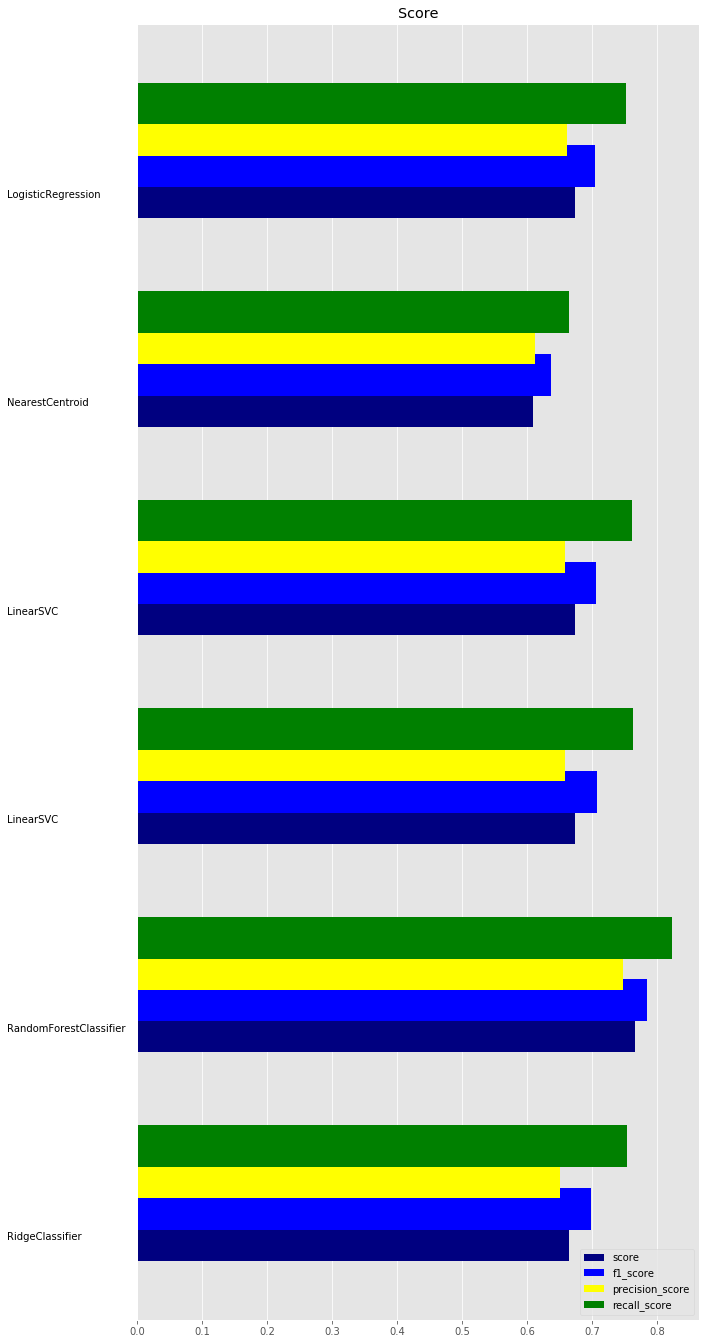

In [45]:
# make some plots
indices = np.arange(len(results))

result = [[x[i] for x in results] for i in range(8)]

clf_names, score, train_time, test_time,f1_score,precision_score,recall_score,roc_auc_score = result
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 20))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .15, f1_score, .2, label="f1_score", color='blue')
plt.barh(indices + .3, precision_score, .2, label="precision_score", color='yellow')
plt.barh(indices + .45, recall_score, .2, label="recall_score", color='green')
#plt.barh(indices + 1.2, roc_auc_score, .2, label="roc_auc_score", color='darkorange')

#plt.barh(indices + .3, training_time, .2, label="training time",
#         color='c')
#plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.2, i, c)

plt.show()

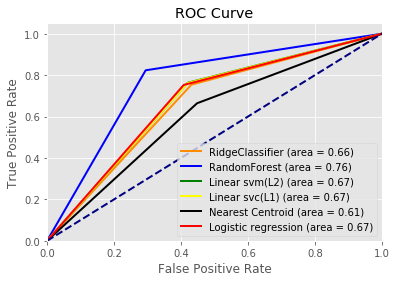

In [46]:
# make some plots
indices = np.arange(len(results))

result_roc = [[x[i] for x in results] for i in range(7,10)]
roc_auc_score,fpr,tpr = result_roc
#training_time = np.array(training_time) / np.max(training_time)
#test_time = np.array(test_time) / np.max(test_time)

plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=2, label='RidgeClassifier (area = %0.2f)' % roc_auc_score[0])
plt.plot(fpr[1], tpr[1], color='blue',
         lw=2, label='RandomForest (area = %0.2f)' % roc_auc_score[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=2, label='Linear svm(L2) (area = %0.2f)' % roc_auc_score[2])
plt.plot(fpr[3], tpr[3], color='yellow',
         lw=2, label='Linear svc(L1) (area = %0.2f)' % roc_auc_score[3])
plt.plot(fpr[4], tpr[4], color='black',
         lw=2, label='Nearest Centroid (area = %0.2f)' % roc_auc_score[4])
plt.plot(fpr[5], tpr[5], color='red',
         lw=2, label='Logistic regression (area = %0.2f)' % roc_auc_score[5])



plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()